In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
diabetes = datasets.load_diabetes()
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.1, random_state = 4)
LinRegr = linear_model.LinearRegression()
LinRegr.fit(X_train, Y_train)
Y_pred = LinRegr.predict(X_test)

print(LinRegr.coef_)

[  21.87305007 -274.6808343   482.09398574  349.98046759 -999.67647128
  595.97095717  228.89167277  329.23064709  778.20654197   74.53591743]


In [7]:
print('MSE:', mean_squared_error(Y_test, Y_pred))

MSE: 2840.791400369432


## LASSO

In [14]:
Lasso = linear_model.Lasso(alpha = 0.2)
Lasso.fit(X_train, Y_train)
Y_pred = Lasso.predict(X_test)


In [15]:
print(Lasso.coef_)

[   0.         -102.68352998  474.59837296  269.69611091   -0.
   -0.         -201.3994291     0.          440.51577799   12.80936069]


In [16]:
mean_squared_error(Y_test, Y_pred)

2513.6849115924374

## Ridge

In [24]:
Ridge = linear_model.Ridge(alpha =0.3)
Ridge.fit(X_train, Y_train)
Y_pred = Ridge.predict(X_test)

Ridge.coef_

array([  37.08745798, -175.93194406,  398.75453773,  280.09166714,
        -39.2997111 ,  -68.87331336, -185.39255521,  156.77469227,
        349.25117774,  107.66055713])

In [20]:
mean_squared_error(Y_test, Y_pred)

2736.3597288232954

In [31]:
epochs = np.arange(1, 11)
epochs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [58]:
n_alphas = 100
alphas = np.linspace(0, 0.5, n_alphas)
COEF = []
for a in alphas:
    Ridge = linear_model.Ridge(alpha = a)
    Ridge.fit(X_train, Y_train)
    COEF.append(Ridge.coef_)

In [59]:
alphas

array([0.        , 0.00505051, 0.01010101, 0.01515152, 0.02020202,
       0.02525253, 0.03030303, 0.03535354, 0.04040404, 0.04545455,
       0.05050505, 0.05555556, 0.06060606, 0.06565657, 0.07070707,
       0.07575758, 0.08080808, 0.08585859, 0.09090909, 0.0959596 ,
       0.1010101 , 0.10606061, 0.11111111, 0.11616162, 0.12121212,
       0.12626263, 0.13131313, 0.13636364, 0.14141414, 0.14646465,
       0.15151515, 0.15656566, 0.16161616, 0.16666667, 0.17171717,
       0.17676768, 0.18181818, 0.18686869, 0.19191919, 0.1969697 ,
       0.2020202 , 0.20707071, 0.21212121, 0.21717172, 0.22222222,
       0.22727273, 0.23232323, 0.23737374, 0.24242424, 0.24747475,
       0.25252525, 0.25757576, 0.26262626, 0.26767677, 0.27272727,
       0.27777778, 0.28282828, 0.28787879, 0.29292929, 0.2979798 ,
       0.3030303 , 0.30808081, 0.31313131, 0.31818182, 0.32323232,
       0.32828283, 0.33333333, 0.33838384, 0.34343434, 0.34848485,
       0.35353535, 0.35858586, 0.36363636, 0.36868687, 0.37373

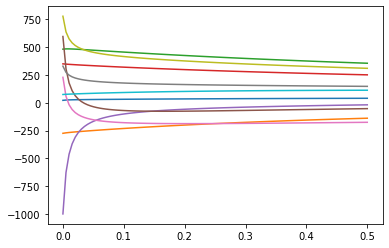

In [60]:
ax = plt.gca()
ax.plot(alphas, COEF)